## Eval-1 Project Titanic

##### Problem Statement:

 The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

Note: You can find the dataset in the link below.
Download Files:
https://github.com/dsrscientist/dataset1/blob/master/titanic_train.csv


In [115]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [13]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")
dt

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [11]:
type(dt)

pandas.core.frame.DataFrame

### Dataset information

In [466]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### In this dataset,various deatils about the passengers travelling in the ship "Titanic" are mentioned in 12 columns and 891 rows.
- PassengetID,Survived passengers,Name, sex, Age, Ticket, Fare and Cabin are self explanatory as per their names.
- Survived has binary data, where 0= not survived, 1= survived.
- Pclass (Ticket class): 1 = 1st, 2 = 2nd, 3 = 3rd
- SibSp: number of siblings/spouses aboard the Titanic
- Parch: number of parents/children aboard the Titanic
- Embarked column shows 3 values 'S', 'C', 'Q', where they mention the port of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton

In [19]:
#if has null value, fill those by imputation
dt.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

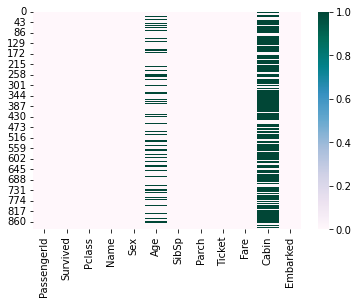

In [20]:
import seaborn as sns
sns.heatmap(dt.isnull(),cmap='PuBuGn')

#### 866 null values there : 177 in "Age",2 in "Embark" and 687 in "Cabin" columns, so let's proceed ahead with replacing them by using the immputation technique.

### As our target column is "Survived", so to predict if a passenger on Titanic would survive or not, we can concentrate on a data without the unnecessary columns. == We drop few columns.
- "Name" - Has no roled to play in knowing the survival of a person or not.
- "PassengerId","Ticket","Cabin"

In [22]:
dt.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [25]:
dt.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Few columns are categorical, which we can later convert in numerical with the encoding technique, using label encoder.

In [29]:
from sklearn.impute import SimpleImputer

SI = SimpleImputer(strategy='most_frequent')
dt['Age']=SI.fit_transform(dt['Age'].values.reshape(-1,1))
dt['Embarked']=SI.fit_transform(dt['Embarked'].values.reshape(-1,1))#1=row,-1=manycolumns
dt

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,24.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [30]:
dt.isnull().sum().sum()  #no null values now

0

In [31]:
dt.shape #gives nos of rows and columns

(891, 8)

In [32]:
dt.columns #name of columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [33]:
dt["Survived"].unique() #target/dependent variable

array([0, 1], dtype=int64)

### Using Label Encoder for "Sex" and "Cabin" and "Embarked" columns to convert the categorical data in numerical data.

In [34]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
l=['Sex','Embarked']
for val in l:
    dt[val]=le.fit_transform(dt[val].astype(str))

In [35]:
dt.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


#### All the data is in numerical form now.

## Visualization of the data

<AxesSubplot:xlabel='Sex', ylabel='count'>

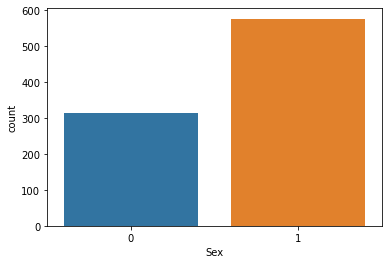

In [55]:
sns.countplot(data=dt,x='Sex')

- From the graph, it can be inferred that the males were more in the non survival category while females were given first preference to save their lives.

<AxesSubplot:xlabel='Survived', ylabel='count'>

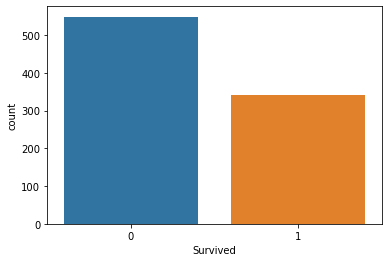

In [56]:
sns.countplot(x='Survived', data = dt)

- The number of survivals is  less than the number of nonsurvivals.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

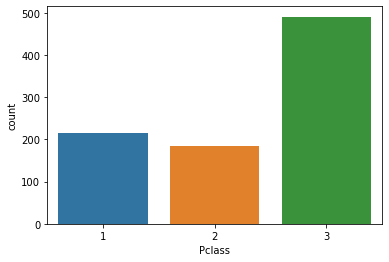

In [57]:
sns.countplot(data=dt,x='Pclass')

- From the graph, an inference can be made that, the passengers belonging to the Class 3 were more in number, followed by class 1 and then class 2.

<AxesSubplot:xlabel='Survived', ylabel='SibSp'>

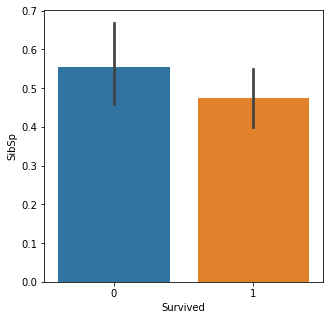

In [58]:
plt.figure(figsize = (5,5))
sns.barplot(y='SibSp', x='Survived' , data = dt)

- The number of siblings/spouses to have survived, as per the graph, are less than the non survivals.

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

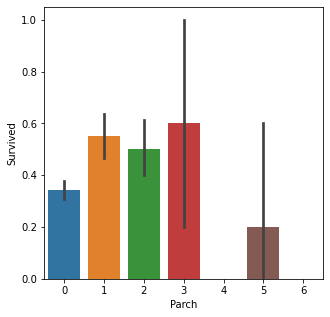

In [59]:
plt.figure(figsize = (5,5))
sns.barplot(y='Survived', x='Parch' , data = dt)

- Parents/children in total 3 (2 parents + 1 child/1 parent-2 children) survival rate is almost similar to that of the 1 parent or 1 child survival rate.

<AxesSubplot:xlabel='Embarked', ylabel='count'>

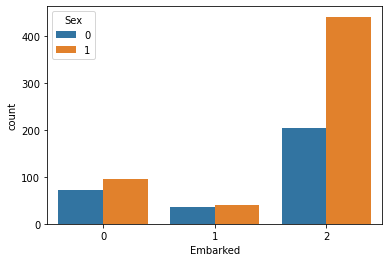

In [60]:
sns.countplot(x='Embarked',hue="Sex", data=dt)

- Of the total passengers, Female passengers who were embarked at Southampton were most, while least were in Queenstown.

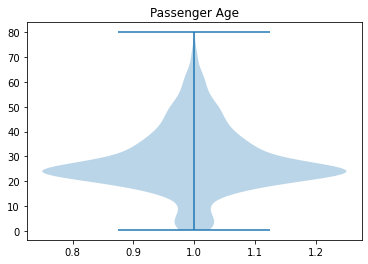

In [61]:
plt.violinplot(dt['Age'])
plt.title('Passenger Age')
plt.show()

- Most passenegrs seem to be between age 12-45 yo, while very few were above 50 and below 15 years of age.

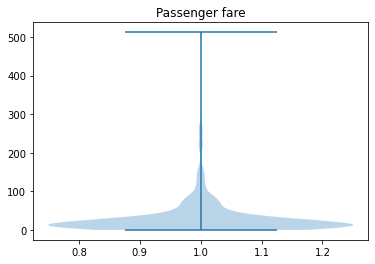

In [62]:
plt.violinplot(dt['Fare'])
plt.title('Passenger fare')
plt.show()

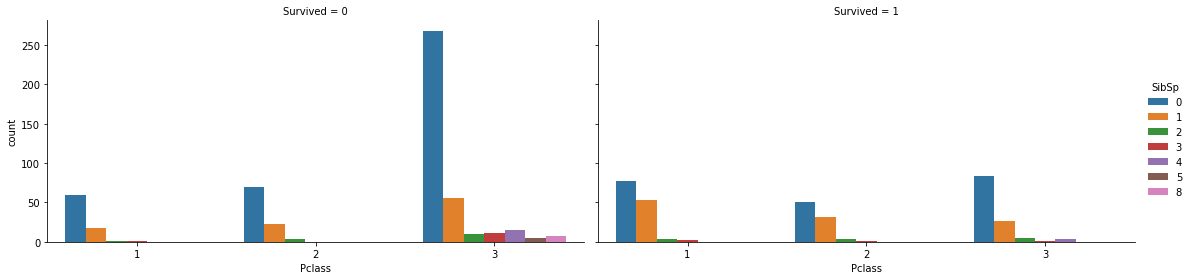

In [63]:
sns.catplot(x="Pclass", hue="SibSp", col="Survived",
                data=dt, kind="count",
                height=4, aspect=2)

- The first plot shows the non surival graphical data - class 3 passengers were more in the non-survived category.
- The second plot shows the survived passengers data:
    - Comparatively class 1 passengers were more in the survival category (given that there were less passengers in Class 1 compared to Class 3)
    - Most were having a spouse or a sibling

## EXPLATORY DATA ANALYSIS(EDA)

In [68]:
dt.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,28.566970,0.523008,0.381594,32.204208,1.536476
std,0.486592,0.836071,0.477990,13.199572,1.102743,0.806057,49.693429,0.791503
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,1.000000,24.000000,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


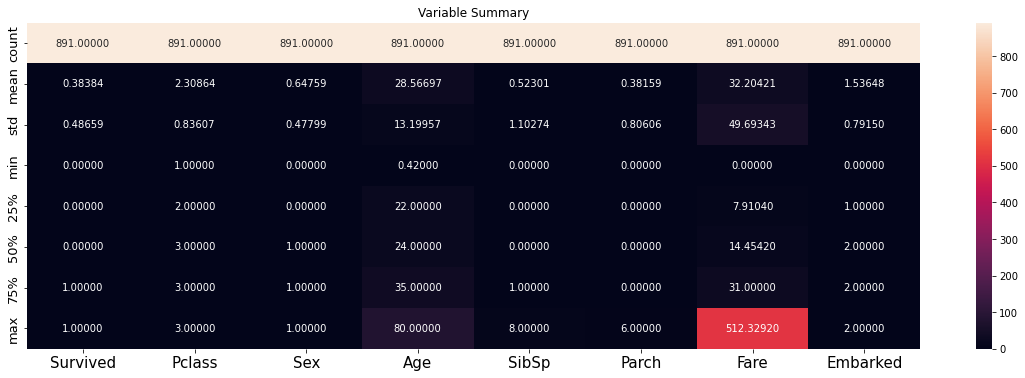

In [69]:
#plotting heat map for better understanding:
plt.figure(figsize=(20,6))
sns.heatmap(dt.describe(),annot=True,fmt='0.5f')
plt.xticks(fontsize=15)
plt.yticks(fontsize=13)
plt.title("Variable Summary")
plt.show()

### Describing the dataset:
- The mean > Median in 'Age', 'Fare', which means data is right skewed.
- Std deviation is high in 'Age', 'Fare', which means data is highly spread.
- High gap is present between 75% and max of 'Age','SibSp', 'Parch', 'Fare'. It means outliers might be present.

## Check Correlation of columns with the target:

In [70]:
dt.corr() #correlation 

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.052872,-0.035322,0.081629,0.257307,-0.167675
Pclass,-0.338481,1.000000,0.131900,-0.356187,0.083081,0.018443,-0.549500,0.162098
Sex,-0.543351,0.131900,1.000000,0.073377,-0.114631,-0.245489,-0.182333,0.108262
Age,-0.052872,-0.356187,0.073377,1.000000,-0.232411,-0.155118,0.107554,-0.000020
SibSp,-0.035322,0.083081,-0.114631,-0.232411,1.000000,0.414838,0.159651,0.068230
Parch,0.081629,0.018443,-0.245489,-0.155118,0.414838,1.000000,0.216225,0.039798
Fare,0.257307,-0.549500,-0.182333,0.107554,0.159651,0.216225,1.000000,-0.224719
Embarked,-0.167675,0.162098,0.108262,-0.000020,0.068230,0.039798,-0.224719,1.000000


<AxesSubplot:>

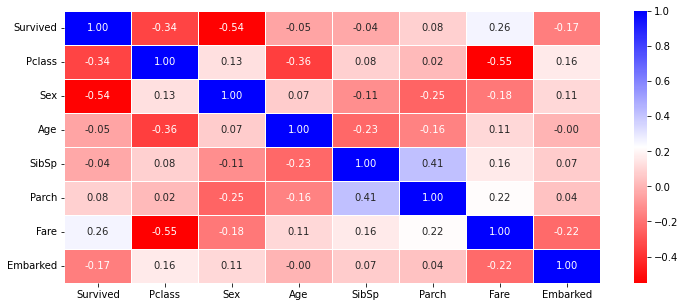

In [71]:
plt.figure(figsize=(12,5))
sns.heatmap(dt.corr(),cmap='bwr_r',annot=True,linewidth=0.5,fmt='0.2f')

In [72]:
dt.corr()['Survived'].sort_values(ascending=False)

Survived    1.000000
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.052872
Embarked   -0.167675
Pclass     -0.338481
Sex        -0.543351
Name: Survived, dtype: float64

The heatmap shows, max negative correlation with the columns "Sex","Pclass","Embarked". Hence we can drop these columns if needed.

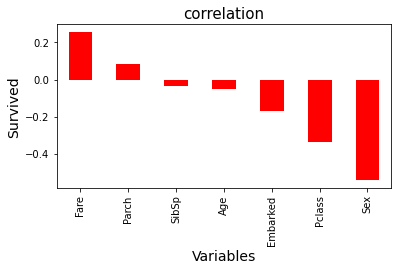

In [73]:
#checking the columns which are positively and negatively corelated with the target column:

plt.figure(figsize=(6,3))
dt.corr()["Survived"].sort_values(ascending=False).drop(["Survived"]).plot(kind='bar', color='r')
plt.xlabel('Variables',fontsize=14)
plt.ylabel("Survived",fontsize=14)
plt.title("correlation",fontsize=15)
plt.show()

In [74]:
#we can drop the "Sex", "Pclass" from the columns as they show most negative corelation with the target variable.
df=dt.drop(['Sex','Pclass'],axis=1)
df

,Survived,Age,SibSp,Parch,Fare,Embarked
0,0,22.0,1,0,7.2500,2
1,1,38.0,1,0,71.2833,0
2,1,26.0,0,0,7.9250,2
3,1,35.0,1,0,53.1000,2
4,0,35.0,0,0,8.0500,2
...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,2
887,1,19.0,0,0,30.0000,2
888,0,24.0,1,2,23.4500,2
889,1,26.0,0,0,30.0000,0


## Check Skewness where Threshold=+/-0.5


In [75]:
x=df.drop('Survived',axis=1)
y=df['Survived']

In [76]:
df.skew().sort_values(ascending=False)

Fare        4.787317
SibSp       3.695352
Parch       2.749117
Age         0.657753
Survived    0.478523
Embarked   -1.264823
dtype: float64

In [77]:
#Removing Skewness
from sklearn.preprocessing import power_transform
x1=power_transform(x)
x1

array([[-0.43887591,  1.37363642, -0.56025296, -0.87882001,  0.61041095],
       [ 0.74377626,  1.37363642, -0.56025296,  1.33665056, -1.78052001],
       [-0.12567301, -0.67984996, -0.56025296, -0.79006485,  0.61041095],
       ...,
       [-0.28048413,  1.37363642,  1.84685634,  0.28888536,  0.61041095],
       [-0.12567301, -0.67984996, -0.56025296,  0.52790578, -1.78052001],
       [ 0.32040318, -0.67984996, -0.56025296, -0.81234947, -1.23633916]])

In [78]:
#check skewness removed?
pd.DataFrame(x1).skew().sort_values(ascending=False)

2    1.228795
1    0.808608
0    0.080888
3   -0.040329
4   -1.064527
dtype: float64

In [79]:
type(x1)

numpy.ndarray

In [80]:
x=pd.DataFrame(x1, columns=x.columns)
x

,Age,SibSp,Parch,Fare,Embarked
0,-0.438876,1.373636,-0.560253,-0.878820,0.610411
1,0.743776,1.373636,-0.560253,1.336651,-1.780520
2,-0.125673,-0.679850,-0.560253,-0.790065,0.610411
3,0.534611,1.373636,-0.560253,1.067352,0.610411
4,0.534611,-0.679850,-0.560253,-0.774439,0.610411
...,...,...,...,...,...
886,-0.049502,-0.679850,-0.560253,-0.294907,0.610411
887,-0.684090,-0.679850,-0.560253,0.527906,0.610411
888,-0.280484,1.373636,1.846856,0.288885,0.610411
889,-0.125673,-0.679850,-0.560253,0.527906,-1.780520


In [81]:
x.skew().sort_values(ascending=False)

Parch       1.228795
SibSp       0.808608
Age         0.080888
Fare       -0.040329
Embarked   -1.064527
dtype: float64

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

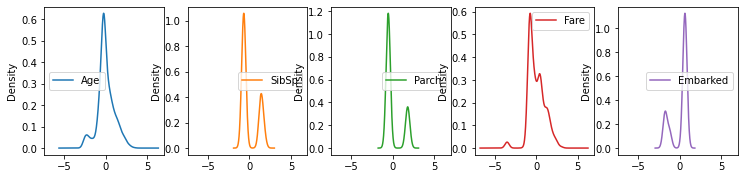

In [83]:
pd.DataFrame(x).plot(kind='kde',subplots=True,layout=(2,6),figsize=(15,6))

### Skewness is removed

## Checking Outliers:

Survived       AxesSubplot(0.125,0.657941;0.133621x0.222059)
Age         AxesSubplot(0.285345,0.657941;0.133621x0.222059)
SibSp        AxesSubplot(0.44569,0.657941;0.133621x0.222059)
Parch       AxesSubplot(0.606034,0.657941;0.133621x0.222059)
Fare        AxesSubplot(0.766379,0.657941;0.133621x0.222059)
Embarked       AxesSubplot(0.125,0.391471;0.133621x0.222059)
dtype: object

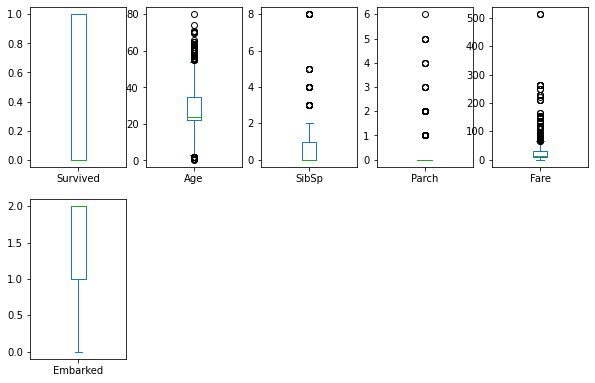

In [84]:
df.plot(kind='box',subplots=True,layout=(3,5),figsize=(10,10))

Here outliers may be present in Age, SibSp, Fare and Parch columns mostly. Hence, we need to remove those.

### Removing Outliers

In [85]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z.head()


,Survived,Age,SibSp,Parch,Fare,Embarked
0,0.789272,0.497793,0.432793,0.473674,0.502445,0.585954
1,1.266990,0.715048,0.432793,0.473674,0.786845,1.942303
2,1.266990,0.194583,0.474545,0.473674,0.488854,0.585954
3,1.266990,0.487640,0.432793,0.473674,0.420730,0.585954
4,0.789272,0.487640,0.474545,0.473674,0.486337,0.585954


In [86]:
#threshold for zscore values-----> above 3 are considered as outliers.

threshold=3
print(np.where(z>3))

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
       119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
       299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 493,
       527, 541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686,
       689, 700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792, 813,
       824, 846, 850, 851, 858, 863, 885], dtype=int64), array([3, 2, 3, 4, 2, 2, 2, 2, 3, 4, 1, 1, 4, 2, 2, 2, 3, 2, 2, 2, 2, 2,
       4, 2, 2, 2, 4, 4, 2, 4, 3, 4, 4, 2, 3, 3, 4, 2, 1, 4, 2, 2, 4, 3,
       3, 1, 3, 1, 3, 4, 2, 2, 4, 4, 4, 4, 3, 4, 4, 1, 3, 4, 2, 2, 2, 2,
       2, 2, 1, 3, 2, 3], dtype=int64))


In [88]:
z.iloc[13,3], z.iloc[885][3]

(5.73284383018578, 5.73284383018578)

In [89]:
DF=df[(z<3).all(axis=1)]
DF

,Survived,Age,SibSp,Parch,Fare,Embarked
0,0,22.0,1,0,7.2500,2
1,1,38.0,1,0,71.2833,0
2,1,26.0,0,0,7.9250,2
3,1,35.0,1,0,53.1000,2
4,0,35.0,0,0,8.0500,2
...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,2
887,1,19.0,0,0,30.0000,2
888,0,24.0,1,2,23.4500,2
889,1,26.0,0,0,30.0000,0


In [91]:
print('Old_DF:',df.shape)
print('New_DF:',DF.shape)
print('total dropped rows:',df.shape[0]-DF.shape[0])

Old_DF: (891, 6)
New_DF: (820, 6)
total dropped rows: 71


### Percentage data loss
Checking how many outliers are still there and if they help in the testing model or not.

In [92]:
loss_percent=(891-820)/891*100
print(loss_percent,'%')

7.968574635241302 %


### Using SMOTE to balance the target column:

In [93]:
#from imblearn.over_sampling import SMOTE

smt=SMOTE()
trainx,trainy=smt.fit_resample(x,y)
trainx.value_counts()

Age        SibSp      Parch      Fare       Embarked 
-0.280484  -0.679850  -0.560253  -0.812349  -1.236339    23
                                 -0.774439   0.610411    15
                                 -0.793750   0.610411    14
                                 -3.534079   0.610411     8
            1.780003   1.846856   1.314385   0.610411     7
                                                         ..
           -0.679850  -0.560253  -0.807561   0.610411     1
                                 -0.807533  -1.236339     1
                                 -0.806470   0.610411     1
                                 -0.766715   0.610411     1
 3.324285  -0.679850  -0.560253   0.527906   0.610411     1
Length: 922, dtype: int64

In [94]:
trainy.value_counts()

0    549
1    549
Name: Survived, dtype: int64

In [95]:
y=trainy

<AxesSubplot:xlabel='Survived', ylabel='count'>

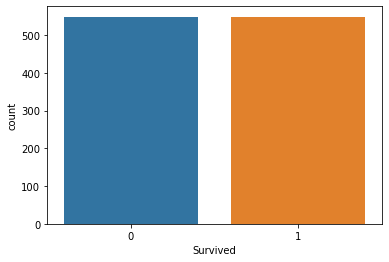

In [96]:
sns.countplot(y)

#### Target column data is balanced

## Scaling The Data using Standard Scaler
#### Since the data is in binary we will use the logistic regression model

In [98]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(trainx)
x

array([[-0.42502788,  1.3537119 , -0.58061804, -0.95343999,  0.64700064],
       [ 0.76873557,  1.3537119 , -0.58061804,  1.22648984, -1.67473169],
       [-0.10888236, -0.69477881, -0.58061804, -0.86610865,  0.64700064],
       ...,
       [-0.26514797, -0.69477881, -0.58061804, -0.88803578, -1.14630059],
       [-0.17570916, -0.69477881, -0.58061804,  1.06621317,  0.64700064],
       [ 1.1660407 , -0.69477881, -0.58061804, -0.35623294,  0.64700064]])

# Training of the data

### Finding the best random fit

In [102]:
lr=LogisticRegression()
MaxAcu=0 #Max Accuracy
MaxRS=0 #best random state for which best accuracy is acheived

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(trainx,trainy,train_size=0.33,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    
    print(f"At random state {i} the Maximum accuracy score is: {accuracy_score(y_test,pred)*100}")
    print("\n")
    if acc>MaxAcu:
        MaxAcu=acc
        MaxRS=i 

At random state 1 the Maximum accuracy score is: 65.35326086956522


At random state 2 the Maximum accuracy score is: 64.94565217391305


At random state 3 the Maximum accuracy score is: 64.94565217391305


At random state 4 the Maximum accuracy score is: 66.9836956521739


At random state 5 the Maximum accuracy score is: 64.67391304347827


At random state 6 the Maximum accuracy score is: 69.15760869565217


At random state 7 the Maximum accuracy score is: 66.84782608695652


At random state 8 the Maximum accuracy score is: 65.89673913043478


At random state 9 the Maximum accuracy score is: 66.84782608695652


At random state 10 the Maximum accuracy score is: 64.67391304347827


At random state 11 the Maximum accuracy score is: 66.30434782608695


At random state 12 the Maximum accuracy score is: 65.89673913043478


At random state 13 the Maximum accuracy score is: 65.89673913043478


At random state 14 the Maximum accuracy score is: 63.17934782608695


At random state 15 the Maximum

At random state 6 the Maximum accuracy score is: 69.15

In [104]:
rf=RandomForestClassifier()
MaxAcu=0 #Max Accuracy
MaxRS=0 #best random state for which best accuracy is acheived

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(trainx,trainy,train_size=0.33,random_state=i)
    rf.fit(x_train,y_train)
    pred=rf.predict(x_test)
    acc=accuracy_score(y_test,pred)
    
    print(f"At random state {i} the Maximum accuracy score is: {accuracy_score(y_test,pred)*100}")
    print("\n")
    if acc>MaxAcu:
        MaxAcu=acc
        MaxRS=i    

At random state 1 the Maximum accuracy score is: 72.01086956521739


At random state 2 the Maximum accuracy score is: 67.66304347826086


At random state 3 the Maximum accuracy score is: 68.75


At random state 4 the Maximum accuracy score is: 68.07065217391305


At random state 5 the Maximum accuracy score is: 65.35326086956522


At random state 6 the Maximum accuracy score is: 67.25543478260869


At random state 7 the Maximum accuracy score is: 69.97282608695652


At random state 8 the Maximum accuracy score is: 67.25543478260869


At random state 9 the Maximum accuracy score is: 71.46739130434783


At random state 10 the Maximum accuracy score is: 67.3913043478261


At random state 11 the Maximum accuracy score is: 71.73913043478261


At random state 12 the Maximum accuracy score is: 68.07065217391305


At random state 13 the Maximum accuracy score is: 70.5163043478261


At random state 14 the Maximum accuracy score is: 67.79891304347827


At random state 15 the Maximum accuracy sco

### At random state 56 the Maximum accuracy score is: 71.73== 72%

Moving on with the train test split

In [105]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=56)
x_train.shape,x_test.shape, y_train.shape,y_test.shape

((735, 5), (363, 5), (735,), (363,))

### Logistic regression

In [106]:
LR=LogisticRegression()
LR.fit(x_train,y_train) #training the model
predlr=LR.predict(x_test) #predicted target variable
print("Accuracy Score is:",accuracy_score(y_test,predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))
print('\n') 

Accuracy Score is: 66.11570247933885
[[134  50]
 [ 73 106]]
              precision    recall  f1-score   support

           0       0.65      0.73      0.69       184
           1       0.68      0.59      0.63       179

    accuracy                           0.66       363
   macro avg       0.66      0.66      0.66       363
weighted avg       0.66      0.66      0.66       363





### Random Forest Classifier

In [122]:
#from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='entropy') 
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

72.1763085399449
[[127  57]
 [ 44 135]]
              precision    recall  f1-score   support

           0       0.74      0.69      0.72       184
           1       0.70      0.75      0.73       179

    accuracy                           0.72       363
   macro avg       0.72      0.72      0.72       363
weighted avg       0.72      0.72      0.72       363



### K Neighbour Classifier

In [108]:
kn=KNeighborsClassifier(n_neighbors=5) #nos of neighbors by default =5
kn.fit(x_train,y_train)
kn.score(x_train,y_train)
predkn=kn.predict(x_test)
print(accuracy_score (y_test, predkn)*100)
print(confusion_matrix(y_test,predkn))
print(classification_report(y_test,predkn))

67.76859504132231
[[115  69]
 [ 48 131]]
              precision    recall  f1-score   support

           0       0.71      0.62      0.66       184
           1       0.66      0.73      0.69       179

    accuracy                           0.68       363
   macro avg       0.68      0.68      0.68       363
weighted avg       0.68      0.68      0.68       363



### Support vector Classifier

In [109]:
svc=SVC(kernel='rbf')

svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score (y_test, predsvc)*100)
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

68.31955922865014
[[126  58]
 [ 57 122]]
              precision    recall  f1-score   support

           0       0.69      0.68      0.69       184
           1       0.68      0.68      0.68       179

    accuracy                           0.68       363
   macro avg       0.68      0.68      0.68       363
weighted avg       0.68      0.68      0.68       363



### Decision Tree Classifier

In [110]:
dtc=DecisionTreeClassifier() 
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc)*100)
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

66.94214876033058
[[130  54]
 [ 66 113]]
              precision    recall  f1-score   support

           0       0.66      0.71      0.68       184
           1       0.68      0.63      0.65       179

    accuracy                           0.67       363
   macro avg       0.67      0.67      0.67       363
weighted avg       0.67      0.67      0.67       363



In [111]:
dtc=DecisionTreeClassifier(criterion='entropy') 
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc)*100)
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

69.9724517906336
[[134  50]
 [ 59 120]]
              precision    recall  f1-score   support

           0       0.69      0.73      0.71       184
           1       0.71      0.67      0.69       179

    accuracy                           0.70       363
   macro avg       0.70      0.70      0.70       363
weighted avg       0.70      0.70      0.70       363



### AdaBoost Classification

In [114]:
ad=AdaBoostClassifier(n_estimators=100,random_state=56)   #estimator is 100 by default can change it 50,100,150...
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

0.6611570247933884
[[127  57]
 [ 66 113]]
              precision    recall  f1-score   support

           0       0.66      0.69      0.67       184
           1       0.66      0.63      0.65       179

    accuracy                           0.66       363
   macro avg       0.66      0.66      0.66       363
weighted avg       0.66      0.66      0.66       363



### Gradient Boosting Classification

In [118]:
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
predgb=gb.predict(x_test)
print(accuracy_score(y_test,predgb))
print(confusion_matrix(y_test,predgb))
print(classification_report(y_test,predgb))

0.7107438016528925
[[134  50]
 [ 55 124]]
              precision    recall  f1-score   support

           0       0.71      0.73      0.72       184
           1       0.71      0.69      0.70       179

    accuracy                           0.71       363
   macro avg       0.71      0.71      0.71       363
weighted avg       0.71      0.71      0.71       363



### Extra Trees Classification

In [120]:
et=GradientBoostingClassifier()   #estimator is 100 by default can change it 50,100,150...
et.fit(x_train,y_train)
predet=et.predict(x_test)
print(accuracy_score(y_test,predet))
print(confusion_matrix(y_test,predet))
print(classification_report(y_test,predet))

0.7107438016528925
[[134  50]
 [ 55 124]]
              precision    recall  f1-score   support

           0       0.71      0.73      0.72       184
           1       0.71      0.69      0.70       179

    accuracy                           0.71       363
   macro avg       0.71      0.71      0.71       363
weighted avg       0.71      0.71      0.71       363



#### Here Random Forest Clasifier gives the best accuracy score of 72%

## Cross Validation Method

In [123]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kfold=KFold(9)

scr=cross_val_score(LR,x,y,cv=kfold)
print("Cross validadtion score of Logistic regression Model is", scr.mean())

scr=cross_val_score(rf,x,y,cv=kfold)
print("Cross validadtion score of Random Forest Classifier is", scr.mean())

scr=cross_val_score(kn,x,y,cv=kfold)
print("Cross validadtion score of KNeighborClassifier is", scr.mean())

scr=cross_val_score(svc,x,y,cv=kfold)
print("Cross validadtion score of SVC is", scr.mean())

scr=cross_val_score(dtc,x,y,cv=kfold)
print("Cross validadtion score of DecisionTreeClassifier is", scr.mean())

scr=cross_val_score(ad,x,y,cv=kfold)
print("Cross validadtion score of AdaBoostClassifier is", scr.mean())

scr=cross_val_score(gb,x,y,cv=kfold)
print("Cross validadtion score of GradientBoostingClassifier is", scr.mean())

scr=cross_val_score(et,x,y,cv=kfold)
print("Cross validadtion score of Extra Trees Classifier is", scr.mean())

Cross validadtion score of Logistic regression Model is 0.6475409836065575
Cross validadtion score of Random Forest Classifier is 0.7276867030965392
Cross validadtion score of KNeighborClassifier is 0.663023679417122
Cross validadtion score of SVC is 0.6602914389799636
Cross validadtion score of DecisionTreeClassifier is 0.6885245901639344
Cross validadtion score of AdaBoostClassifier is 0.6657559198542804
Cross validadtion score of GradientBoostingClassifier is 0.6876138433515482
Cross validadtion score of Extra Trees Classifier is 0.6876138433515482


#### Here also, the best CV score is from the Random Forest Classifier which is 73% 
- This is nearby to the accuracy score of 72%, Hence we can say that the Random forest Classifier Algorithm works best for the model

## Hyper parameter tuning of best model above

In [132]:
from sklearn.model_selection import GridSearchCV

#creating parameters to pass in Grid serach
para={'max_features':['sqrt', 'log2', 'None'],'max_depth':[4,5,6,7,8],'criterion':["gini","entropy","log_loss"]}

In [133]:
GCV.best_estimator_

RandomForestClassifier(criterion='log_loss', max_depth=7, max_features='log2')

In [129]:
Fmodel=GridSearchCV(RandomForestClassifier(),para,cv=9,scoring="accuracy")
Fmodel.fit(x_train,y_train) #fiting the data in the model
Fmodel.best_params_ #printing the best parameter found by GCV

{'criterion': 'log_loss', 'max_depth': 6, 'max_features': 'sqrt'}

In [134]:
F_pred=GCV.best_estimator_.predict(x_test)  #predicting with best parameters
accuracy_score(y_test,F_pred)*100 #checking best acuracy score

69.6969696969697

##### The Grid Search CV gives the RandomForest Classifier as the best algorithm for the model training with following best parameters :
    - criterion='Log_loss', max_depth=6, max_features=sqrt
    - and an accuracy score of 70%    

##  AUC-ROC curves:

In [138]:
from sklearn.metrics import roc_auc_score

In [141]:
#Logistic Regression
print("Logistic Regression:" ,roc_auc_score(y_test,predlr))
#Random Forest Classifier
print("Random Forest Classifier:",roc_auc_score(y_test,predrf))
#KNeighbour Classifier
print("KNeighbour Classifier:",roc_auc_score(y_test,predkn))
#SV Classifier
print("SV Classifier:",roc_auc_score(y_test,predsvc))
# Decision Tree Classifier
print("Decision Tree Classifier:",roc_auc_score(y_test,preddtc))
#AdaBoost Classifier Classifier
print("AdaBoost Classifier Classifier:",roc_auc_score(y_test,predad))
#Gradient Boosting Classifier
print("Gradient Boosting Classifier:",roc_auc_score(y_test,predgb))
#Extra Trees Classifier
print("Extra Trees Classifier:",roc_auc_score(y_test,predet))

Logistic Regression: 0.660219820257469
Random Forest Classifier: 0.7222036677192131
KNeighbour Classifier: 0.6784217877094971
SV Classifier: 0.6831734272528538
Decision Tree Classifier: 0.6993259655088656
AdaBoost Classifier Classifier: 0.6607511537527326
Gradient Boosting Classifier: 0.7104991498664076
Extra Trees Classifier: 0.7104991498664076


#### Random Forest Classifier shows the best AUC/ROC score of 72%

ROC AUC curve:

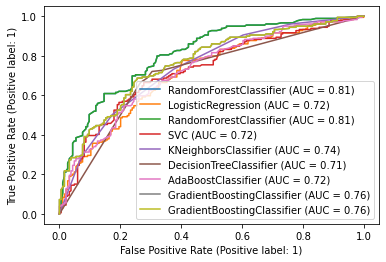

In [142]:
from sklearn.metrics import plot_roc_curve

graph = plot_roc_curve(rf,x_test,y_test)
model= [LR,rf,svc,kn,dtc,ad,gb,et]

for i in model:
    plot_roc_curve(i,x_test,y_test, ax=graph.ax_)
plt.legend(prop = {'size':10}, loc = 'lower right')
plt.show()

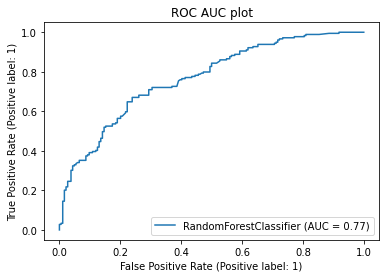

In [143]:
plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title("ROC AUC plot")
plt.show()

## Saving the model

In [144]:
import joblib

joblib.dump(rf,'Titanic.obj') ##save the model as an object file
Titanic_from_joblib=joblib.load('Titanic.obj') #load the model from the file

#use the loaded model to make predictions
Titanic_from_joblib.predict(x_test)

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,

# Thank you!